In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163741 sha256=6e7c6970f6498473ea88178c500e6b251c0ea0dce2b369fcf98e2c07022e1853
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [68]:
import numpy as np
import pandas as pd
from surprise import Dataset,Reader
from surprise import SVD,NMF,NormalPredictor,BaselineOnly,KNNBasic
from surprise.model_selection import train_test_split,cross_validate
from surprise import accuracy
import matplotlib.pyplot as plt

In [5]:
csv_file_path_1 = '/content/drive/MyDrive/Major_Project/Utility_Matrices/Utility_Matrix_5000_0.8.csv'
df_user = pd.read_csv(csv_file_path_1,index_col=0)
df_user.head()

,Manali,Leh Ladakh,Coorg,Andaman,Lakshadweep,Goa,Udaipur,Srinagar,Gangtok,Munnar,...,Bikaner,Shimoga (Shivamogga),Hogenakkal,Gir National Park,Kasauli,Pushkar,Chittorgarh,Nahan,Lavasa,Poovar
Users,,,,,,,,,,,,,,,,,,,,,
user_0,0.0,1.0,4.0,3.0,5.0,1.0,3.0,3.0,0.0,0.0,...,0.0,2.0,3.0,1.0,2.0,2.0,5.0,4.0,4.0,4.0
user_1,2.0,2.0,3.0,5.0,1.0,4.0,5.0,5.0,4.0,2.0,...,0.0,1.0,4.0,1.0,2.0,3.0,2.0,3.0,3.0,0.0
user_2,4.0,4.0,3.0,5.0,2.0,4.0,4.0,3.0,5.0,3.0,...,1.0,4.0,0.0,1.0,1.0,3.0,1.0,5.0,4.0,0.0
user_3,4.0,2.0,1.0,2.0,3.0,1.0,2.0,1.0,5.0,5.0,...,1.0,3.0,5.0,1.0,1.0,3.0,0.0,1.0,4.0,0.0
user_4,1.0,0.0,1.0,1.0,5.0,5.0,1.0,3.0,4.0,1.0,...,3.0,5.0,3.0,2.0,4.0,0.0,5.0,2.0,3.0,2.0


In [6]:
df_user_mod = df_user.reset_index().melt(id_vars='Users', var_name='location', value_name='raw_rating')
df_user_mod.columns = ['user', 'location', 'ratings']

df_user_mod.head()

,user,location,ratings
0,user_0,Manali,0.0
1,user_1,Manali,2.0
2,user_2,Manali,4.0
3,user_3,Manali,4.0
4,user_4,Manali,1.0


In [7]:
reader = Reader(rating_scale=(1, 5))

# Load the DataFrame into a Surprise Dataset
data = Dataset.load_from_df(df_user_mod[['user', 'location', 'ratings']], reader)
data

In [8]:
trainset, testset = train_test_split(data, test_size=.2)

In [9]:
def compute_metrics(model,trainset,testset):

  model.fit(trainset)

  # Make predictions on the test set
  predictions = model.test(testset)
  rmse = accuracy.rmse(predictions)
  mae = accuracy.mae(predictions)

  return rmse,mae

In [70]:
svd = SVD(n_factors=200,n_epochs=50)
rmse,mae = compute_metrics(svd,trainset,testset)

RMSE: 1.7885
MAE:  1.5504


In [10]:
nmf = NMF(n_factors=200,n_epochs=50)
rmse,mae = compute_metrics(nmf,trainset,testset)


RMSE: 1.7730
MAE:  1.5441


In [16]:
np_model = NormalPredictor()
rmse,mae = compute_metrics(np_model,trainset,testset)

RMSE: 2.1944
MAE:  1.8047


In [19]:
bsl_model = BaselineOnly()
rmse,mae = compute_metrics(bsl_model,trainset,testset)

Estimating biases using als...
RMSE: 1.7518
MAE:  1.5365


In [15]:
def cross_validation(model):
  results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
  return results

In [73]:
svd_r = cross_validation(svd)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.7927  1.7868  1.7893  1.7901  1.7894  1.7897  0.0019  
MAE (testset)     1.5558  1.5479  1.5507  1.5527  1.5501  1.5514  0.0027  
Fit time          17.45   17.60   17.28   17.83   17.78   17.59   0.20    
Test time         0.74    1.01    0.73    1.70    0.87    1.01    0.36    


In [74]:
nmf_r = cross_validation(nmf)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.7755  1.7737  1.7719  1.7768  1.7771  1.7750  0.0019  
MAE (testset)     1.5457  1.5449  1.5419  1.5487  1.5475  1.5457  0.0023  
Fit time          23.31   23.11   23.20   23.17   23.31   23.22   0.08    
Test time         0.67    0.65    0.66    0.64    0.96    0.72    0.12    


In [75]:
np_model_r = cross_validation(np_model)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.1966  2.1877  2.1934  2.1951  2.1873  2.1920  0.0038  
MAE (testset)     1.8042  1.7972  1.8027  1.8023  1.7965  1.8006  0.0031  
Fit time          0.56    0.56    0.53    0.69    0.57    0.58    0.06    
Test time         0.59    0.89    0.73    0.56    0.89    0.73    0.14    


In [21]:
bsl_model_r = cross_validation(bsl_model)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.7517  1.7511  1.7525  1.7549  1.7515  1.7523  0.0014  
MAE (testset)     1.5357  1.5352  1.5374  1.5400  1.5360  1.5368  0.0017  
Fit time          0.89    0.89    0.93    1.16    0.88    0.95    0.11    
Test time         0.85    0.66    0.54    0.67    0.66    0.68    0.10    


In [28]:
bsl_model_r

{'test_rmse': array([1.75170143, 1.75112818, 1.75249086, 1.75494511, 1.75147424]),
 'test_mae': array([1.53570654, 1.53519047, 1.53736024, 1.53995221, 1.53603698]),
 'fit_time': (0.8868274688720703,
  0.8942036628723145,
  0.9336109161376953,
  1.1615939140319824,
  0.8821854591369629),
 'test_time': (0.8534090518951416,
  0.6631052494049072,
  0.5391373634338379,
  0.6713278293609619,
  0.6586155891418457)}

In [76]:
perf_dict = {'SVD':svd_r,'NMF':nmf_r,'Normal Predictor':np_model_r,'BaseLine':bsl_model_r}

In [77]:
perf_pd = pd.DataFrame(columns = ['Model','RMSE','MAE','fit_time','test_time'])
for key, value in perf_dict.items():
  perf_pd = perf_pd.append({'Model':key,'RMSE':value['test_rmse'].mean(),
             'MAE':value['test_mae'].mean(),
             'fit_time':(sum(value['fit_time']) / len(value['fit_time'])),
             'test_time':(sum(value['test_time']) / len(value['test_time']))},ignore_index=True)

perf_pd




<ipython-input-77-8e9efb071714>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_pd = perf_pd.append({'Model':key,'RMSE':value['test_rmse'].mean(),
<ipython-input-77-8e9efb071714>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_pd = perf_pd.append({'Model':key,'RMSE':value['test_rmse'].mean(),
<ipython-input-77-8e9efb071714>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_pd = perf_pd.append({'Model':key,'RMSE':value['test_rmse'].mean(),
<ipython-input-77-8e9efb071714>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_pd = perf_pd.append({'Model':key,'RMSE':value['test_rmse'].mean(),


,Model,RMSE,MAE,fit_time,test_time
0,SVD,1.789696,1.551443,17.588405,1.011496
1,NMF,1.774995,1.545742,23.219845,0.716590
2,Normal Predictor,2.192014,1.800590,0.582712,0.731138
3,BaseLine,1.752348,1.536849,0.951684,0.677119


In [78]:
knn_user = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
knn_location = KNNBasic(sim_options={'name': 'cosine', 'user_based': False})

In [79]:
knn_user_r = cross_validation(knn_user)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.7635  1.7679  1.7667  1.7671  1.7649  1.7660  0.0016  
MAE (testset)     1.5372  1.5426  1.5401  1.5424  1.5397  1.5404  0.0020  
Fit time          85.48   80.66   83.26   79.37   82.09   82.17   2.11    
Test time         215.07  209.39  214.72  209.84  213.11  212.42  2.39    


In [80]:
knn_location_r = cross_validation(knn_location)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.7684  1.7661  1.7657  1.7635  1.7662  1.7660  0.0016  
MAE (testset)     1.5439  1.5404  1.5398  1.5355  1.5415  1.5402  0.0027  
Fit time          0.56    0.48    0.47    0.48    0.47    0.49    0.04    
Test time         8.73    8.87    9.30    8.99    8.87    8.95    0.19    


In [81]:
knn_dict = {'KNN(User-based)':knn_user_r,'KNN(Location-Based)':knn_location_r}


In [82]:
for key, value in knn_dict.items():
  perf_pd = perf_pd.append({'Model':key,'RMSE':value['test_rmse'].mean(),
             'MAE':value['test_mae'].mean(),
             'fit_time':(sum(value['fit_time']) / len(value['fit_time'])),
             'test_time':(sum(value['test_time']) / len(value['test_time']))},ignore_index=True)

perf_pd

<ipython-input-82-723f57bbd798>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_pd = perf_pd.append({'Model':key,'RMSE':value['test_rmse'].mean(),
<ipython-input-82-723f57bbd798>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_pd = perf_pd.append({'Model':key,'RMSE':value['test_rmse'].mean(),


,Model,RMSE,MAE,fit_time,test_time
0,SVD,1.789696,1.551443,17.588405,1.011496
1,NMF,1.774995,1.545742,23.219845,0.716590
2,Normal Predictor,2.192014,1.800590,0.582712,0.731138
3,BaseLine,1.752348,1.536849,0.951684,0.677119
4,KNN(User-based),1.766021,1.540367,82.172913,212.424645
5,KNN(Location-Based),1.765975,1.540191,0.492337,8.953782


from matplotlib import pyplot as plt
perf_pd['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
perf_pd['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
perf_pd['fit_time'].plot(kind='hist', bins=20, title='fit_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
perf_pd['test_time'].plot(kind='hist', bins=20, title='test_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
perf_pd.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
perf_pd.plot(kind='scatter', x='RMSE', y='MAE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
perf_pd.plot(kind='scatter', x='MAE', y='fit_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
perf_pd.plot(kind='scatter', x='fit_time', y='test_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fit_time']
  ys = series['RMSE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = perf_pd.sort_values('fit_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fit_time')
_ = plt.ylabel('RMSE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['fit_time']
  ys = series['MAE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = perf_pd.sort_values('fit_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fit_time')
_ = plt.ylabel('MAE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['fit_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'fit_time'}, axis=1)
              .sort_values('fit_time', ascending=True))
  xs = counted['fit_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = perf_pd.sort_values('fit_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('fit_time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['test_time']
  ys = series['RMSE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = perf_pd.sort_values('test_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('test_time')
_ = plt.ylabel('RMSE')

from matplotlib import pyplot as plt
perf_pd['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
perf_pd['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
perf_pd['fit_time'].plot(kind='line', figsize=(8, 4), title='fit_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
perf_pd['test_time'].plot(kind='line', figsize=(8, 4), title='test_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(perf_pd['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(perf_pd, x='RMSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(perf_pd['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(perf_pd, x='MAE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(perf_pd['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(perf_pd, x='fit_time', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(perf_pd['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(perf_pd, x='test_time', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

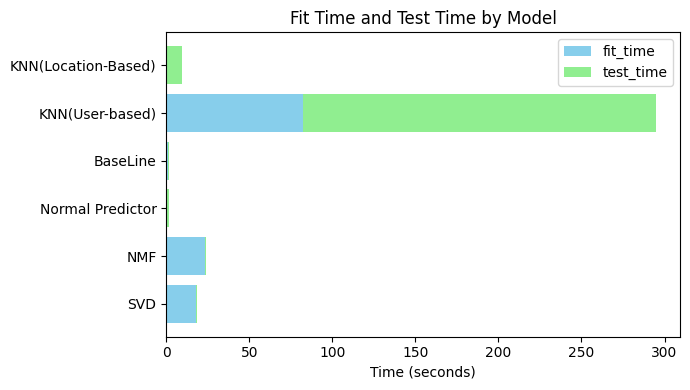

In [87]:

fig, ax = plt.subplots(figsize=(7, 4))

ax.barh(perf_pd['Model'], perf_pd['fit_time'], color='skyblue', label='fit_time')
ax.barh(perf_pd['Model'], perf_pd['test_time'], left=perf_pd['fit_time'], color='lightgreen', label='test_time')

ax.set_xlabel('Time (seconds)')
ax.set_title('Fit Time and Test Time by Model')
ax.legend()

plt.tight_layout()
plt.show()

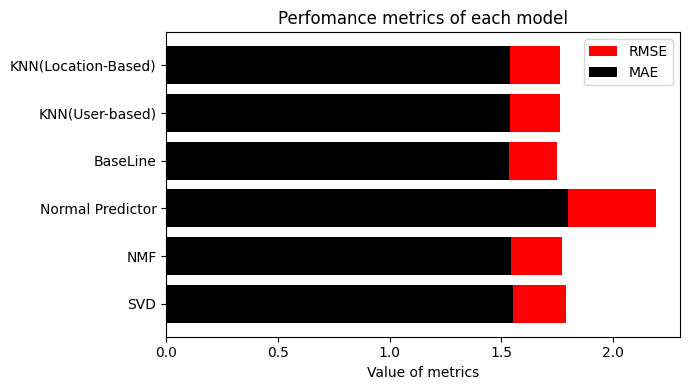

In [89]:
fig, ax_1 = plt.subplots(figsize=(7, 4))
ax_1.barh(perf_pd['Model'], perf_pd['RMSE'], color='red', label='RMSE')
ax_1.barh(perf_pd['Model'], perf_pd['MAE'], color='black', label='MAE')
ax_1.set_xlabel('Value of metrics')
ax_1.set_title('Perfomance metrics of each model')
ax_1.legend()

plt.tight_layout()
plt.show()